# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, make_scorer
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

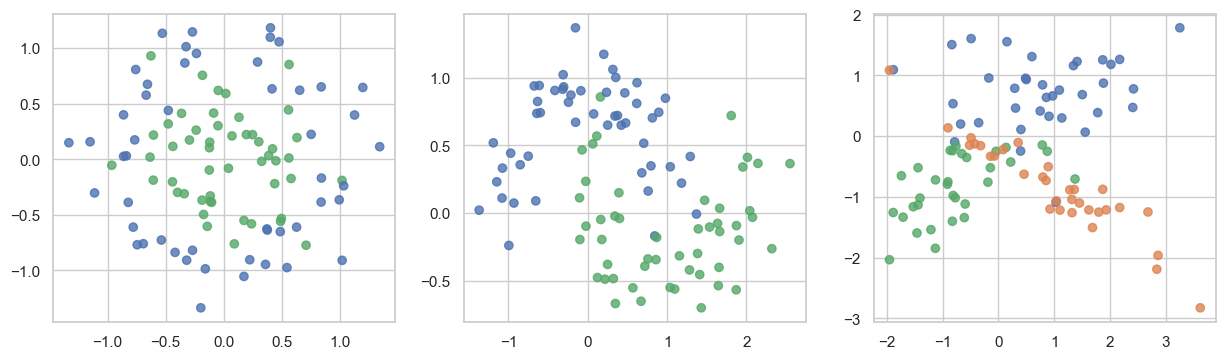

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

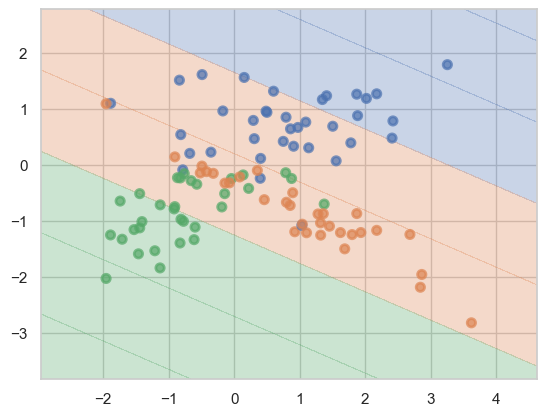

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

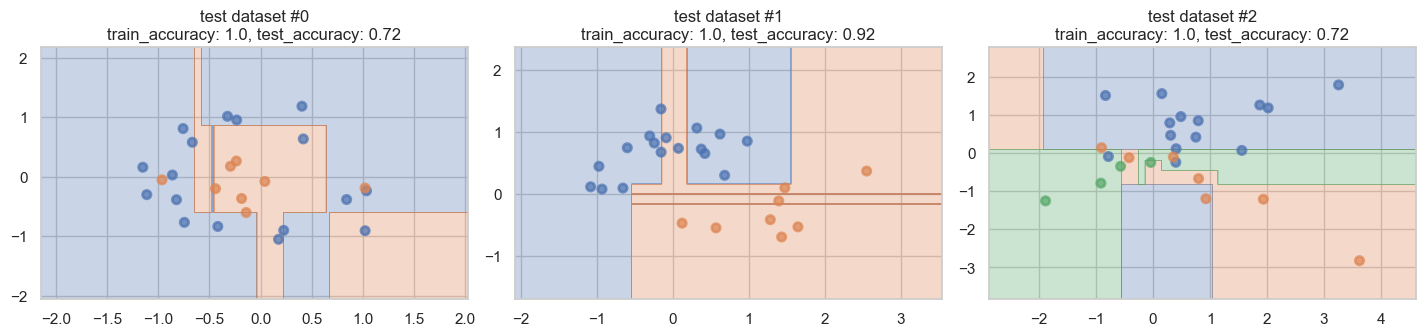

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(15, 4))
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(clf, X_test, y_test)
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    plt.title("test dataset #{}\ntrain_accuracy: {}, test_accuracy: {}".format(i, train_accuracy, test_accuracy))


__Ответ:__

Деревья сильно переобучились, точность 100% на трейне, да и по некоторым веткам сильно тонким видно, что мы начали подгонять дерево под ответ

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [8]:
def CheckHyperParams(i, X, y, max_depth_lst, min_samples_leaf_lst):
    for j, depth in enumerate(max_depth_lst):
        for k, sample_leaf in enumerate(min_samples_leaf_lst):
            
            plt.subplot(3, 3, j * 3 + k + 1)

            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
            clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample_leaf)
            clf.fit(X_train, y_train)
            plot_surface(clf, X_test, y_test)
            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            test_accuracy = accuracy_score(y_test, clf.predict(X_test))
            plt.title("test dataset #{}\ntrain_accuracy: {}, test_accuracy: {}\nmax_depth={}, min_samples_leaf={}".format(i, train_accuracy, test_accuracy, depth, sample_leaf))


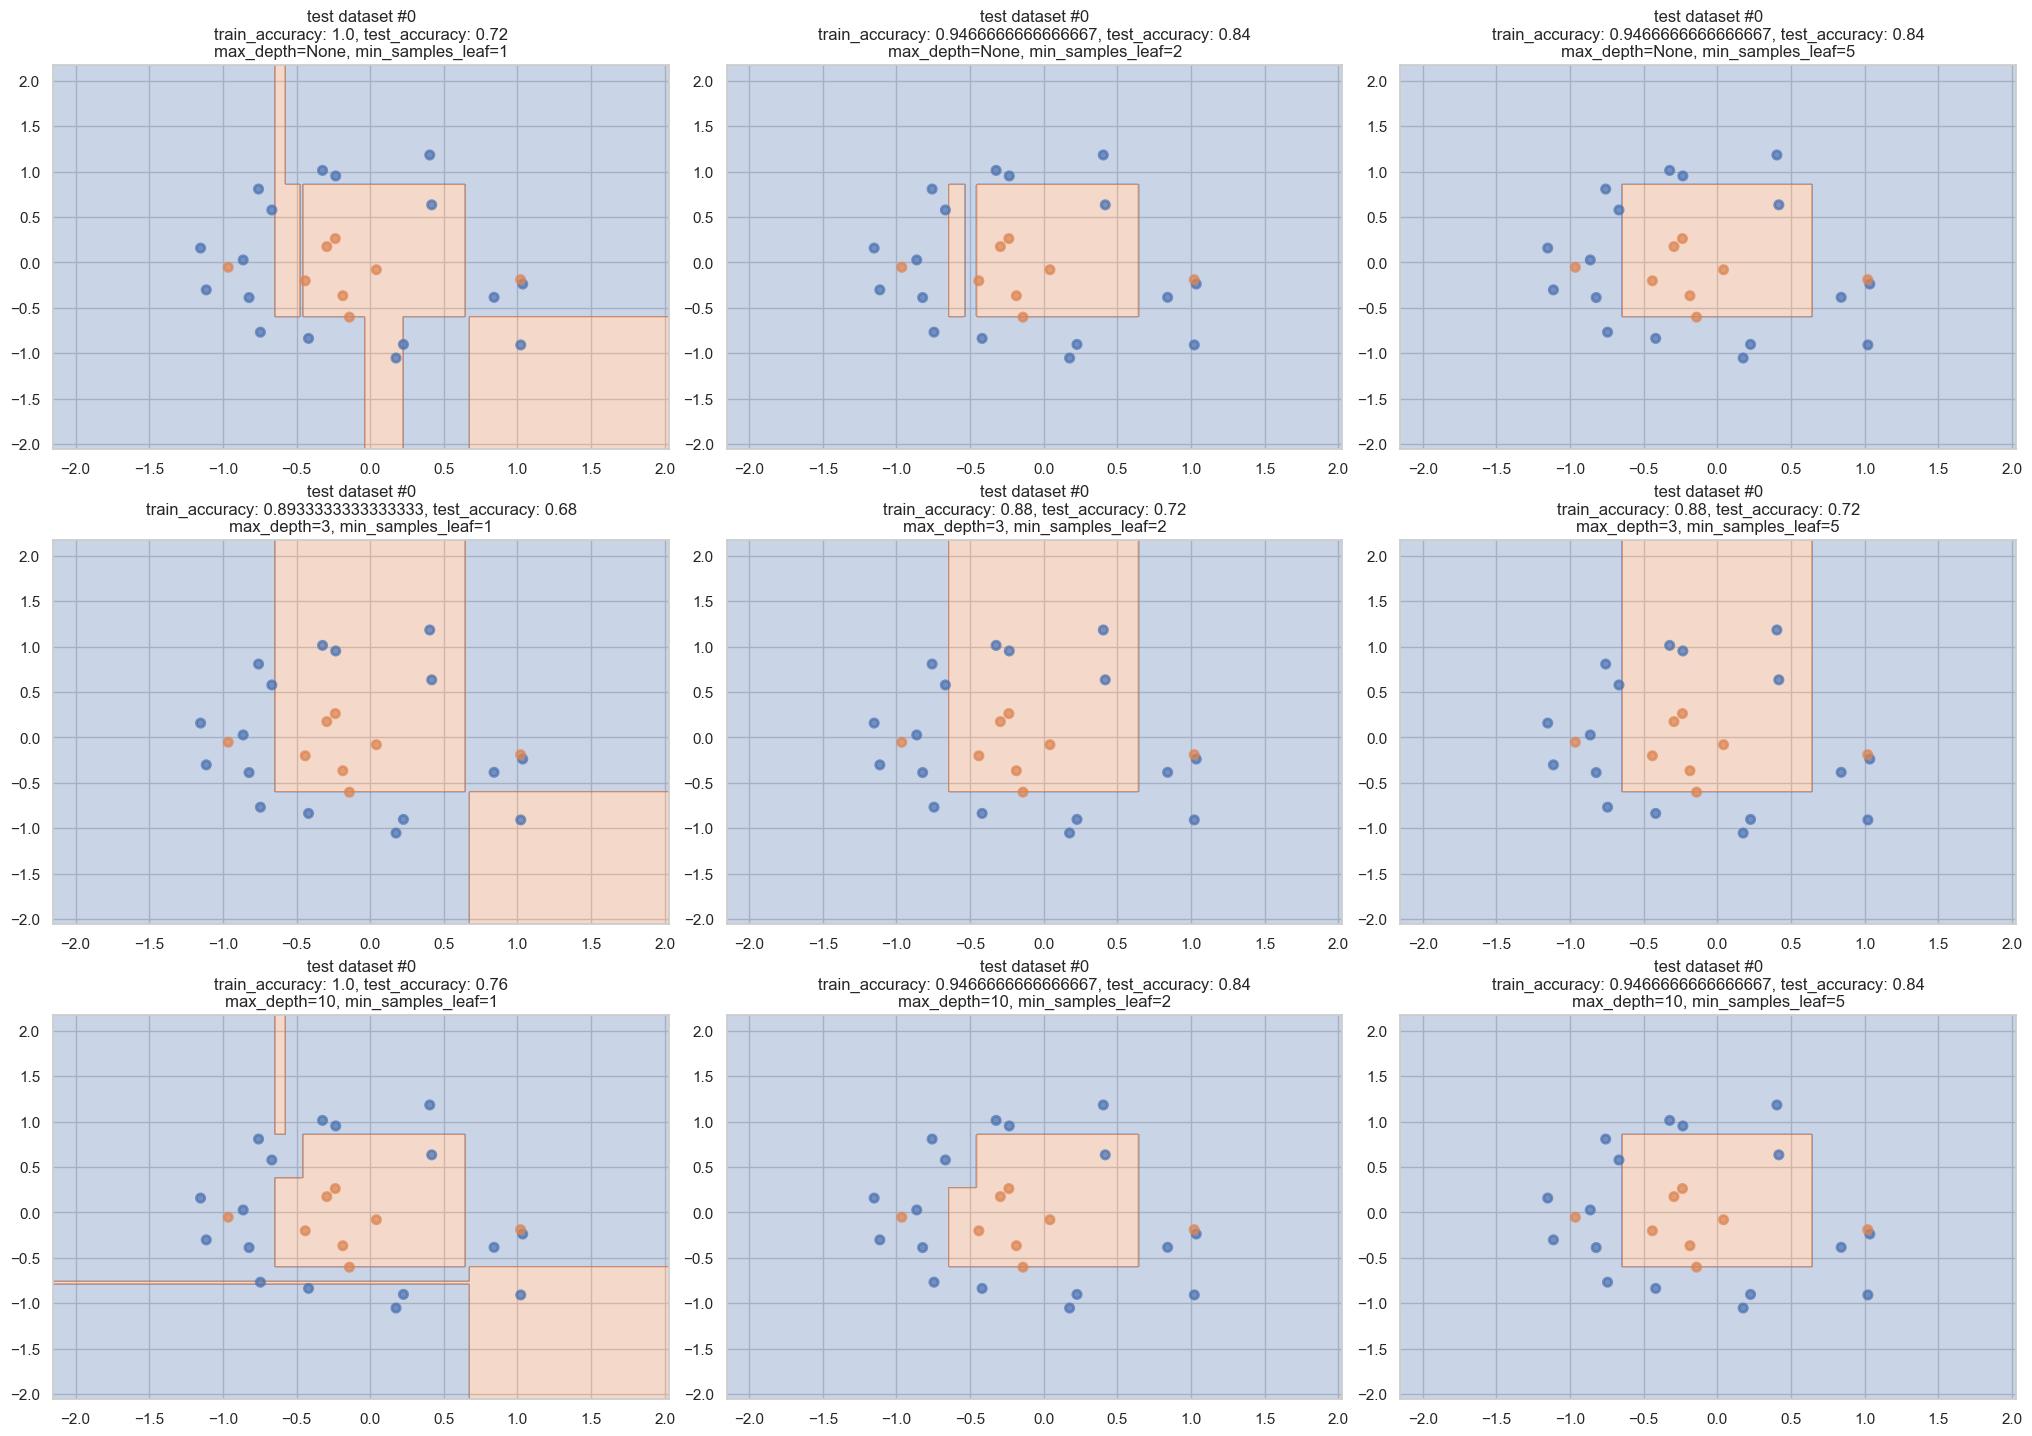

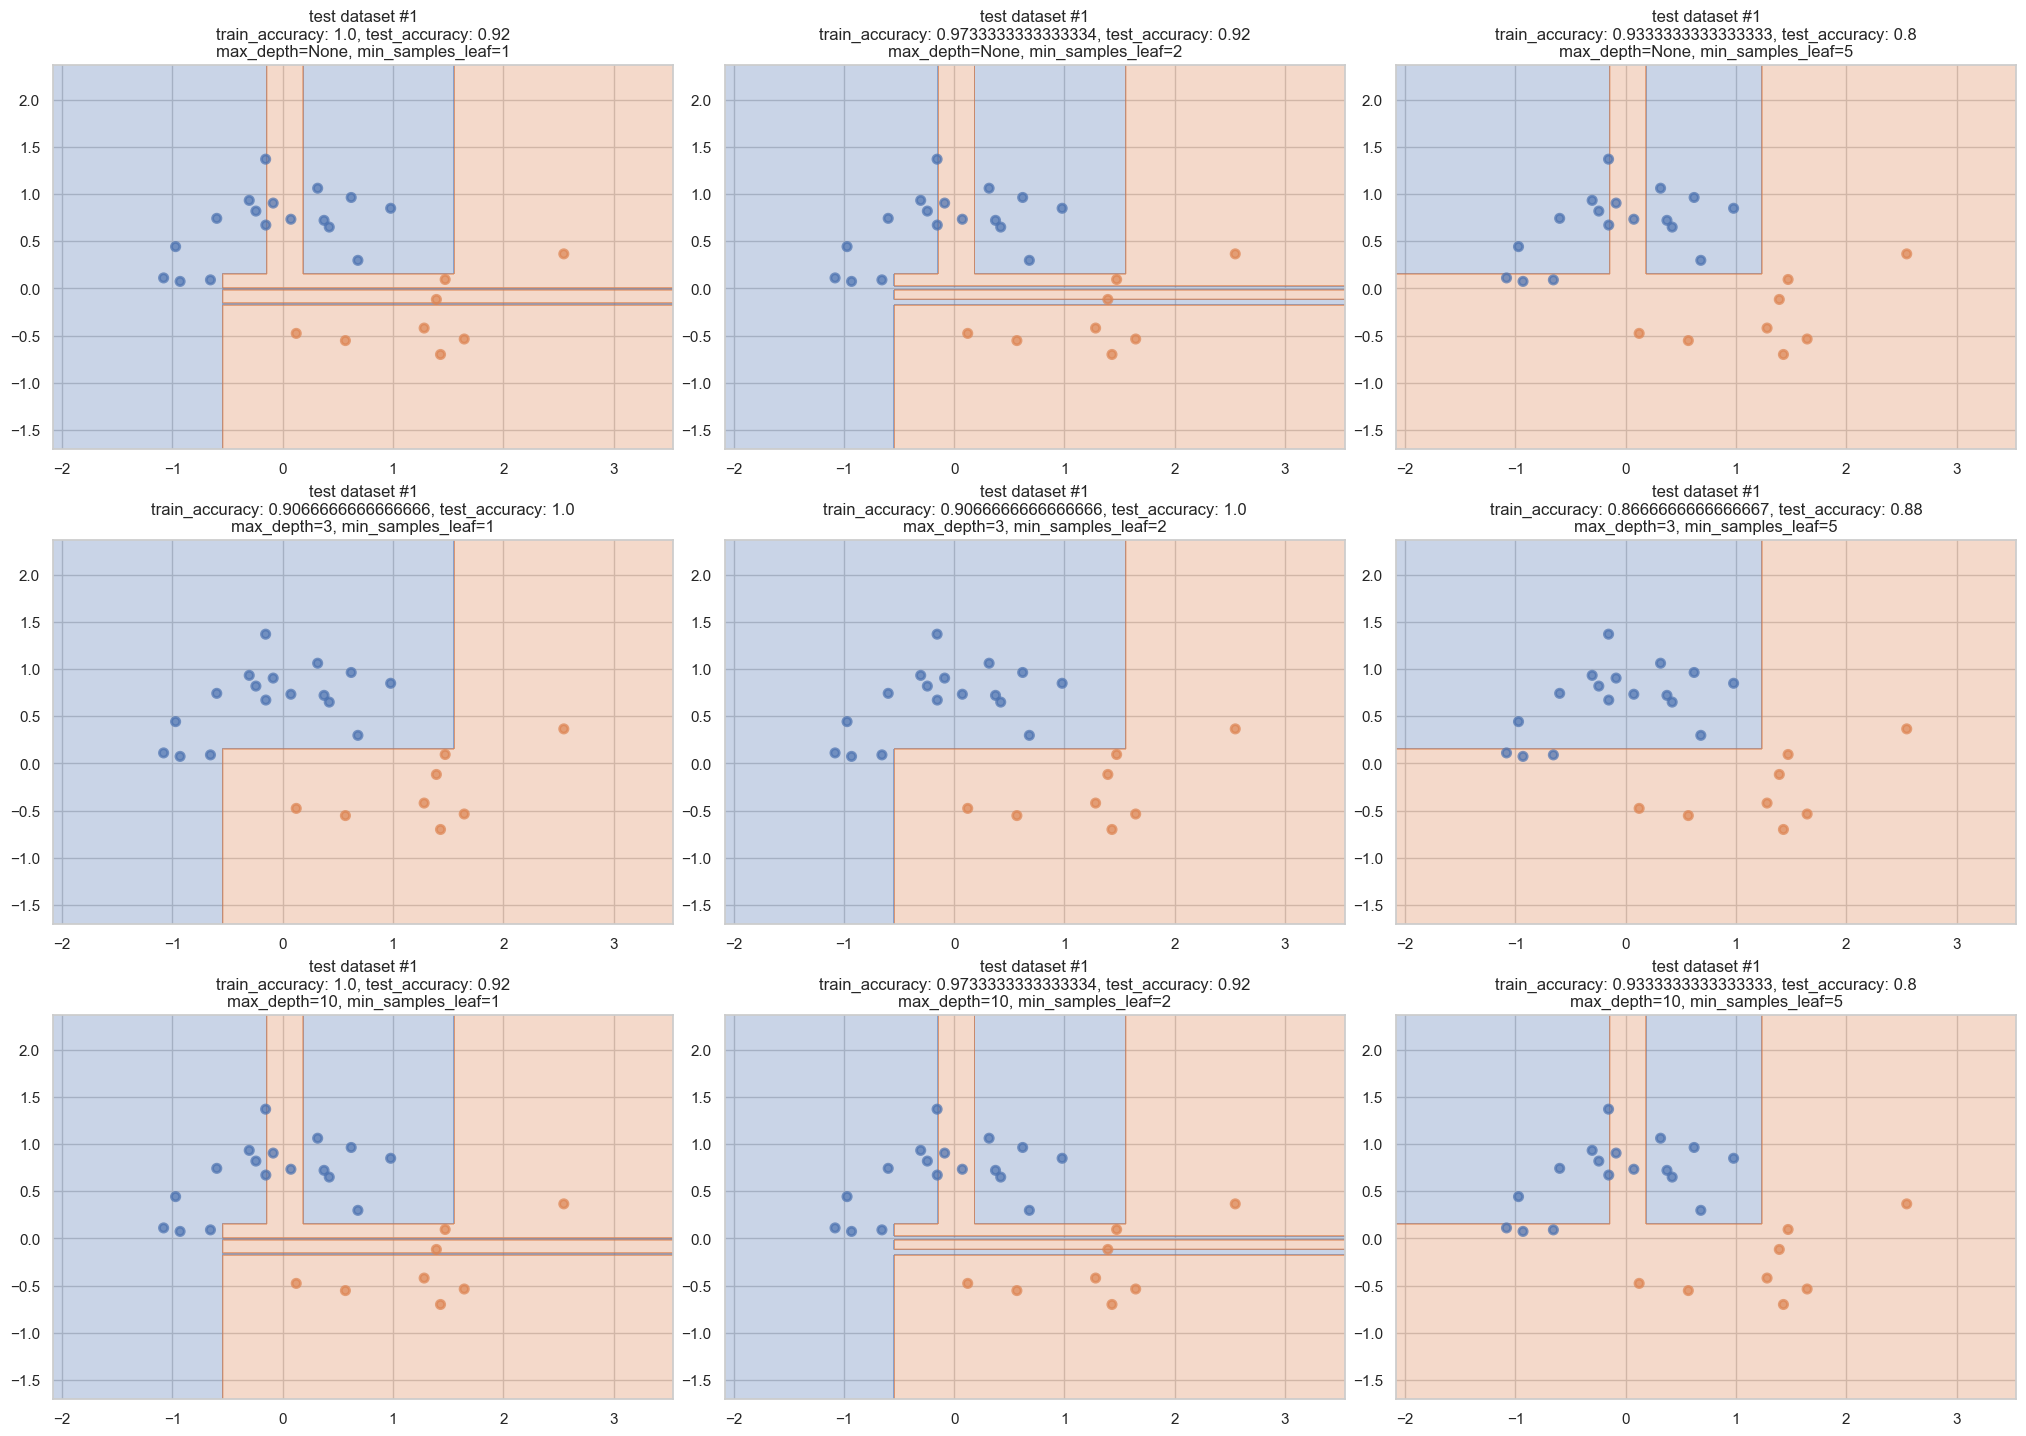

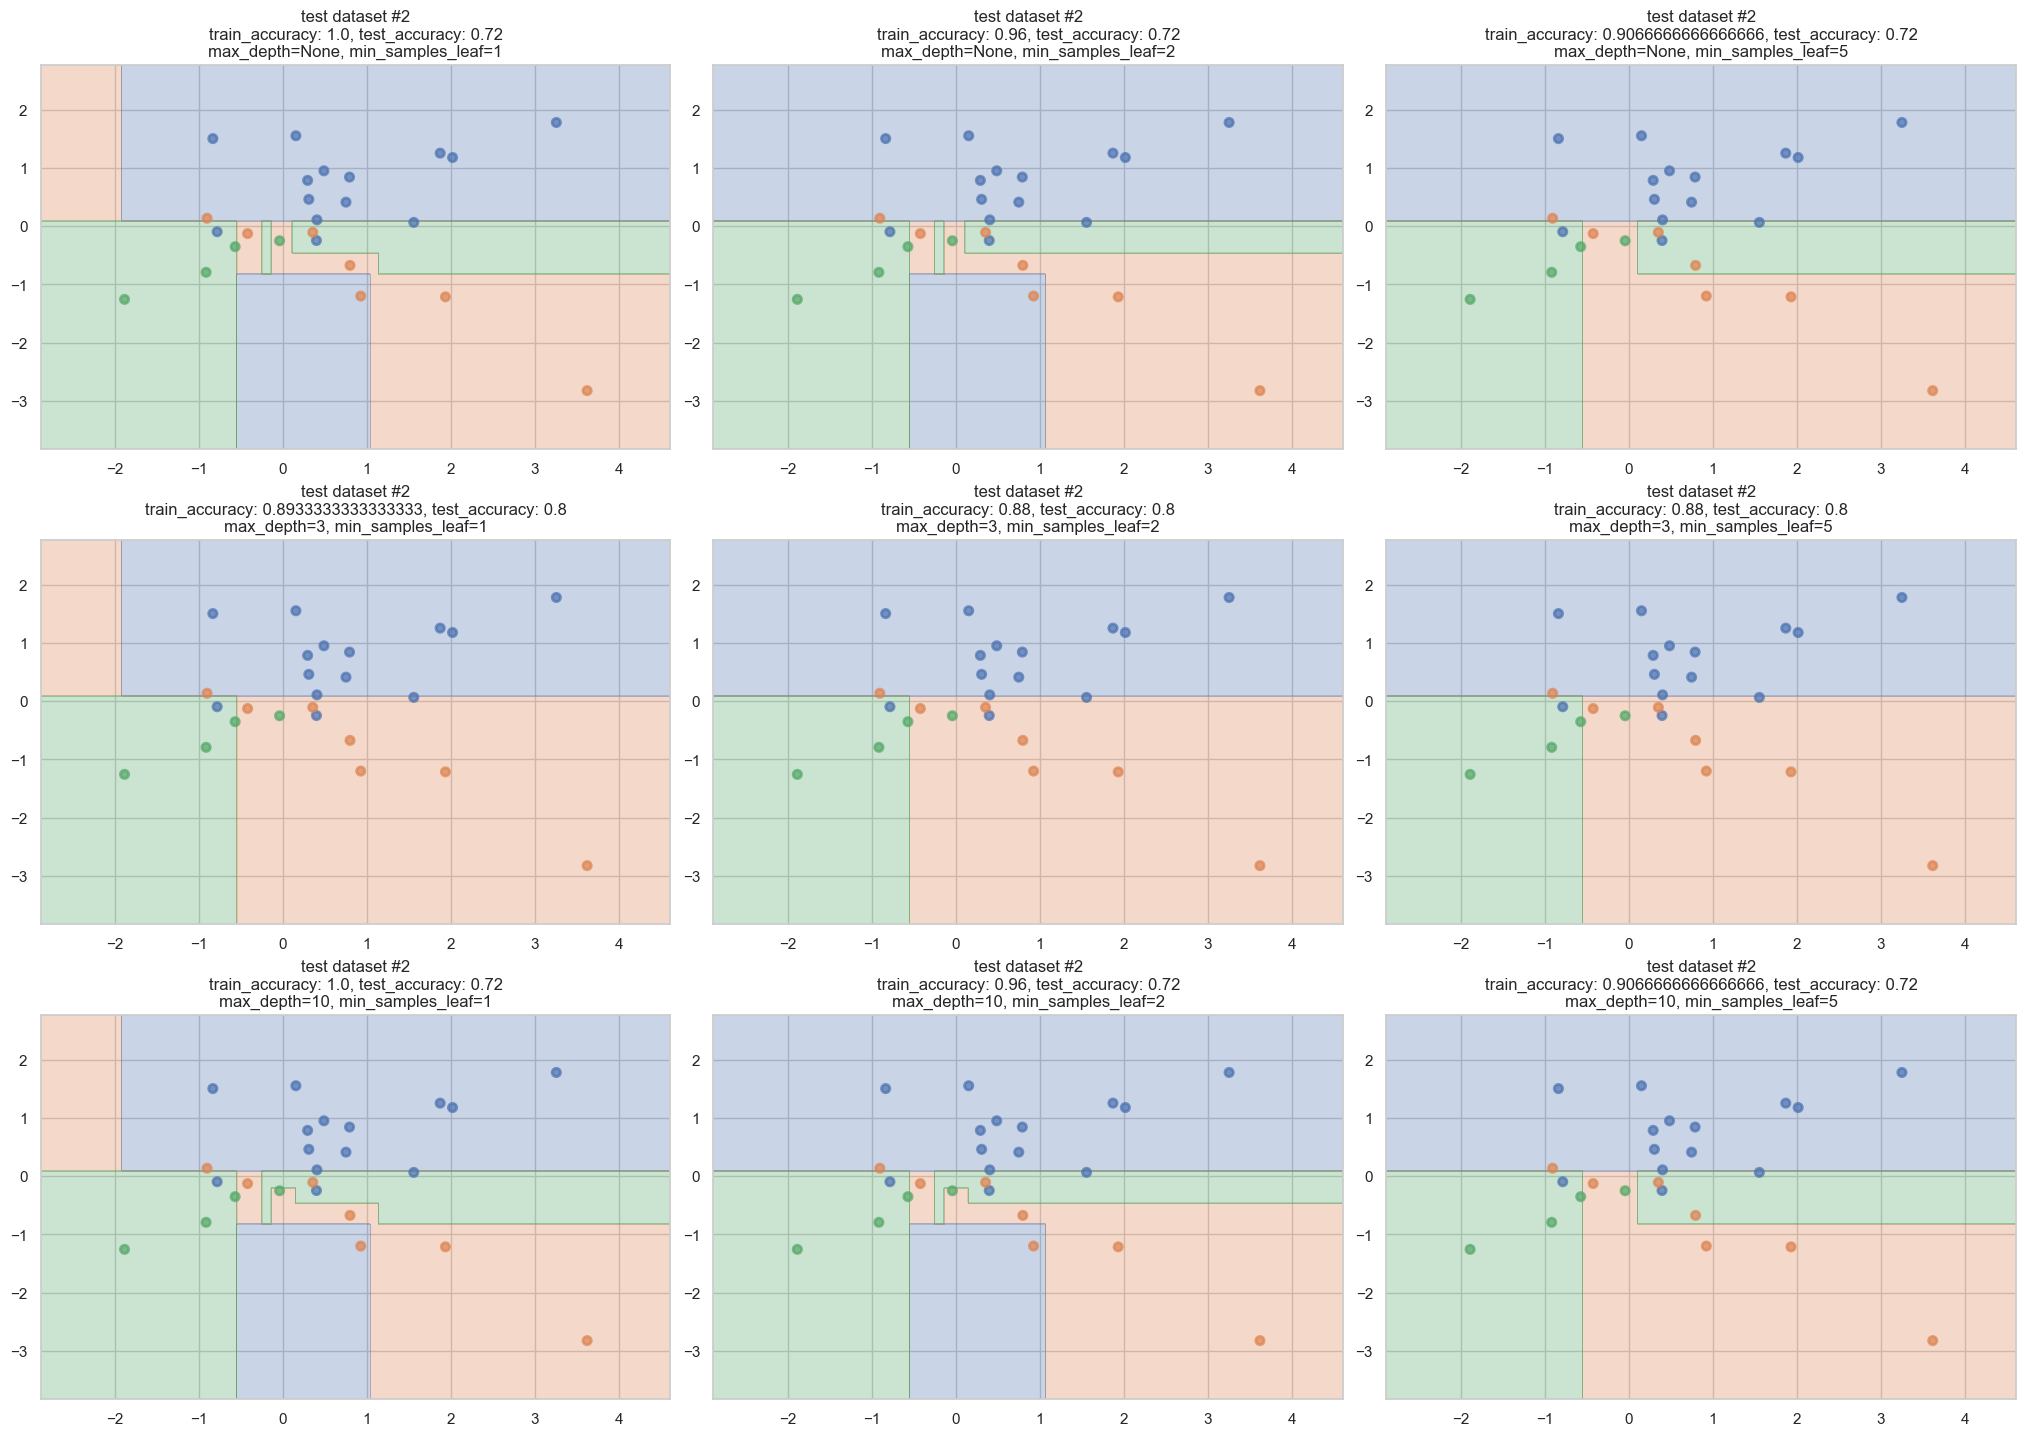

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

for i, (X, y) in enumerate(datasets):
    plt.figure(figsize=(21, 15))
    max_depth_lst = [None, 3, 10]
    min_samples_leaf_lst = [1, 2, 5]
    CheckHyperParams(i, X, y, max_depth_lst, min_samples_leaf_lst)

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

Для дефолтного значения min_samples_leaf=2 test_accuracy показывает наилучшие результаты. Видимо, параметры подобрались у меня так, что max_depth=3 плох на обучении, но иногда выдает оптимальную реализацию на тесте. Вероятно, это от того, что размер тестовой выборки в три раза меньше обучаемой, поэтому она и разбивается лучше при меньшем max_depth 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

id посылки: 102701637

Елисей Ш.

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from hw5code import find_best_split, DecisionTree
df = pd.read_csv('students.csv')
df

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


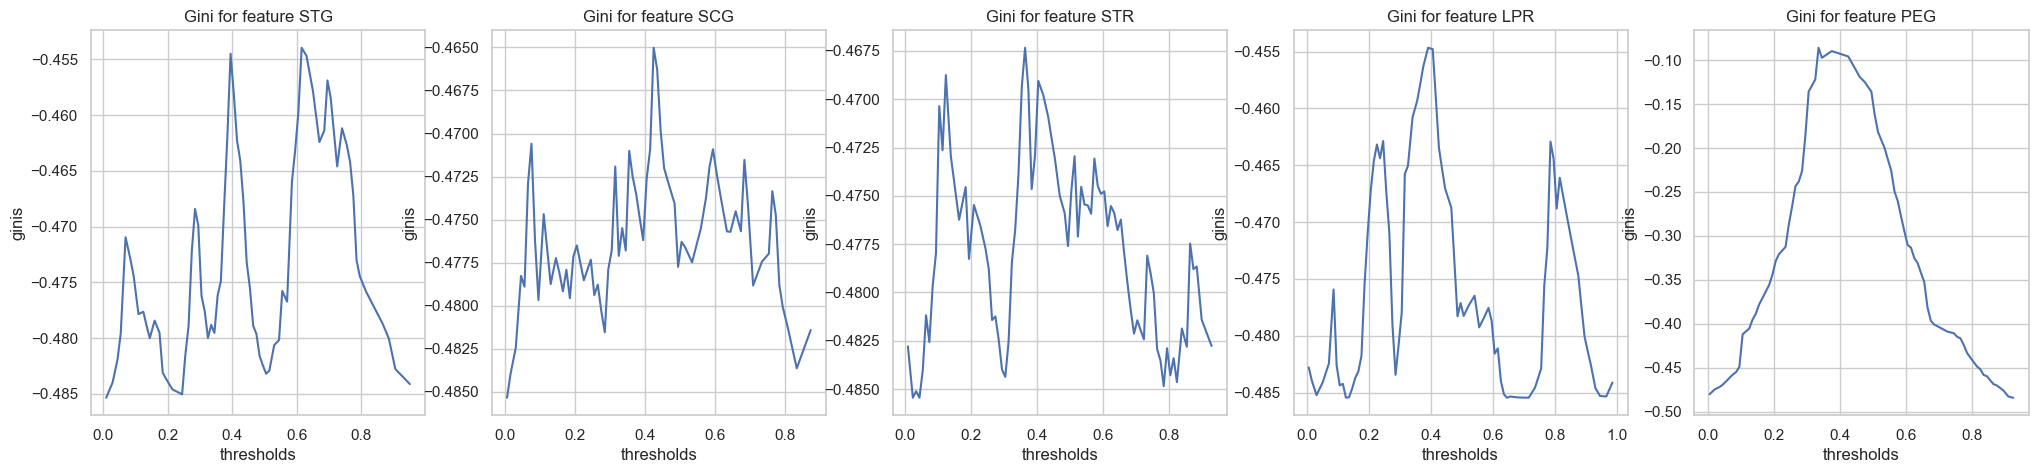

In [12]:
target = 'UNS'
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
for index, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    feature_vector = df[feature].values
    target_vector  = df[target].values
    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, target_vector)
    # min_len = min(len(ginis), len(thresholds))
    min_len = len(thresholds)
    ax[index].plot(thresholds, ginis)
    ax[index].set_title("Gini for feature {}".format(feature))
    ax[index].set_xlabel("thresholds")
    ax[index].set_ylabel("ginis")


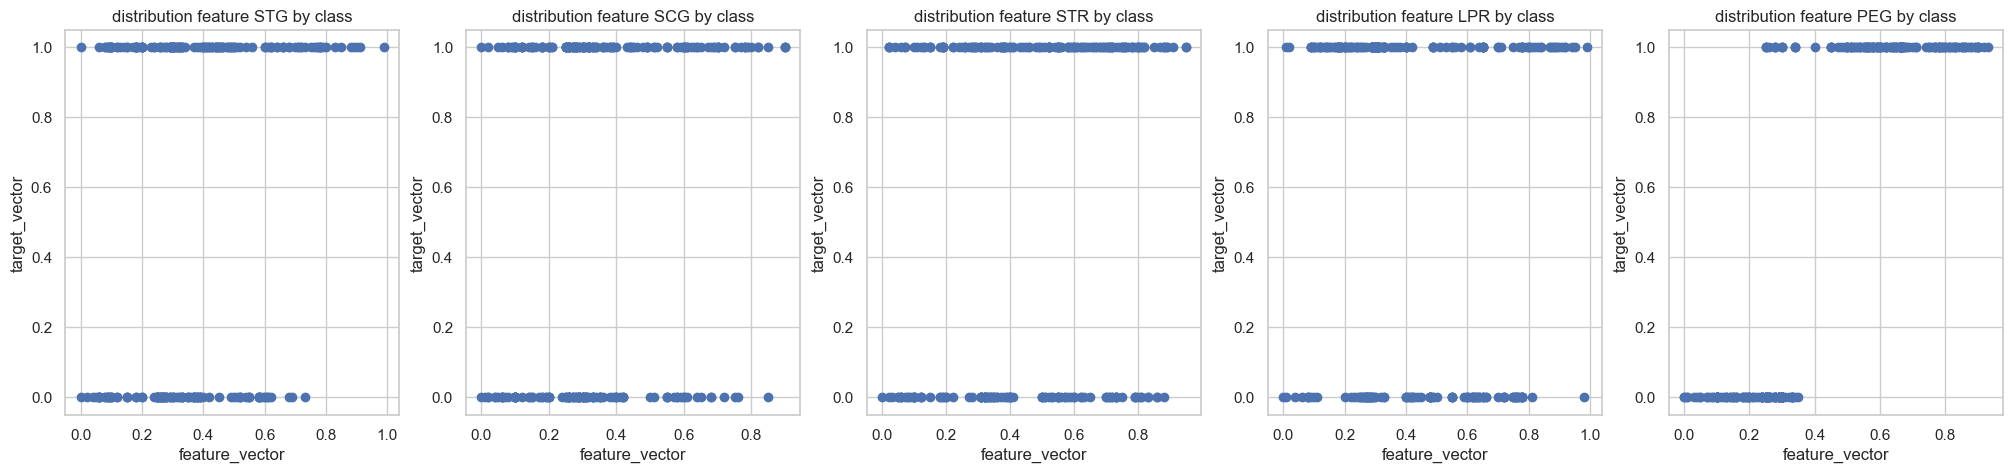

In [13]:
target = 'UNS'
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
for index, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    feature_vector = df[feature].values
    target_vector = df[target].values
    thresholds, ginis, threshold_best, gini_best = find_best_split(feature_vector, target_vector)
    # min_len = min(len(ginis), len(thresholds))
    ax[index].scatter(feature_vector, target_vector)
    ax[index].set_title("distribution feature {} by class".format(feature))
    ax[index].set_xlabel("feature_vector")
    ax[index].set_ylabel("target_vector")


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Судя по всему, нормальное распределение распределения PEG означает кривую "хороших" признаков, точечный график также почти идеально разделяется на два класса. Остальные признаки просто хаотичны

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

id констеста: 102712956

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [15]:
df = pd.read_csv('mushroom/agaricus-lepiota.data')
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [16]:
df['p'] = np.where(df['p'] == 'p', 1, 0)
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [17]:
le = LabelEncoder()
y = df['p']
df.drop(columns='p', inplace=True)
df

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
1,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
2,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
3,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
4,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8119,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8120,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8121,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [18]:
X = df.apply(lambda column: le.fit_transform(column))
X

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8119,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8120,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8121,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [19]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
dt = DecisionTree(["categorical"] * 22)
dt.fit(np.array(X_train), np.array(y_train))
y_pred = dt.predict(np.array(X_test))
acc_score = accuracy_score(np.array(y_test), np.array(y_pred))
print('accuracy_score: {}'.format(acc_score))

accuracy_score: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [34]:
df_ttt = pd.read_csv('tic+tac+toe+endgame/tic-tac-toe.data')
df_ttt['positive'] = np.where(df_ttt['positive'] == 'positive', 1, 0)
y_ttt = df_ttt['positive']
df_ttt.drop(columns='positive', inplace=True)
X_ttt = df_ttt.apply(lambda column: le.fit_transform(column))
X_ttt

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
0,2,2,2,2,1,1,1,2,1
1,2,2,2,2,1,1,1,1,2
2,2,2,2,2,1,1,1,0,0
3,2,2,2,2,1,1,0,1,0
4,2,2,2,2,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2
953,1,2,1,2,2,1,2,1,2
954,1,2,1,2,1,2,2,1,2
955,1,2,1,1,2,2,2,1,2


In [39]:
# for min_samples_split in range(2, 12, 2):
#     for min_samples_leaf in range(1, 11, 2):
#         for max_depth in range(1, 11, 2):
#             dt = DecisionTree(['categorical'] * 9, max_depth, min_samples_leaf, min_samples_split)
#             accuracy = np.mean(cross_val_score(dt, X_ttt, y_ttt, scoring=make_scorer(accuracy_score), cv=10, n_jobs=-1))



__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [20]:
def CVSDTCalculation(X, y, model, label):
    accuracy = np.mean(cross_val_score(model, X, y, scoring=make_scorer(accuracy_score), cv=10, n_jobs=-1))
    print(label, accuracy)

In [21]:
df_mush = pd.read_csv('mushroom/agaricus-lepiota.data')
df_mush['p'] = np.where(df_mush['p'] == 'p', 1, 0)
df_mush

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [22]:
y_mush = df_mush['p']
df_mush.drop(columns='p', inplace=True)
X_mush = df_mush.apply(lambda column: le.fit_transform(column))
X_mush

,x,s,n,t,p.1,f,c,n.1,k,e,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
1,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
2,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
3,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
4,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8119,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8120,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8121,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [23]:
OHE_X_mush = OneHotEncoder(sparse=False).fit_transform(X_mush)
X_mush = np.array(X_mush)
y_mush = np.array(y_mush)
CVSDTCalculation(X_mush, y_mush, DecisionTree(['real'] * 22), "Accuracy on real features mushrooms dataset: ")
CVSDTCalculation(X_mush, y_mush, DecisionTree(['categorical'] * 22), "Accuracy on categorical features mushrooms dataset: ")
CVSDTCalculation(OHE_X_mush, y_mush, DecisionTree(['real'] * OHE_X_mush.shape[1]), "Accuracy on real features with OHE mushrooms dataset: ")
CVSDTCalculation(X_mush, y_mush, DecisionTreeClassifier(), "Accuracy on DecisionTreeClassifier mushrooms dataset: ")

Accuracy on real features mushrooms dataset:  0.9992610837438424
Accuracy on categorical features mushrooms dataset:  1.0
Accuracy on real features with OHE mushrooms dataset:  0.9996305418719211
Accuracy on DecisionTreeClassifier mushrooms dataset:  0.9582898587606566


In [24]:
df_ttt = pd.read_csv('tic+tac+toe+endgame/tic-tac-toe.data')
df_ttt['positive'] = np.where(df_ttt['positive'] == 'positive', 1, 0)
df_ttt

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,1
1,x,x,x,x,o,o,o,o,x,1
2,x,x,x,x,o,o,o,b,b,1
3,x,x,x,x,o,o,b,o,b,1
4,x,x,x,x,o,o,b,b,o,1
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,0
953,o,x,o,x,x,o,x,o,x,0
954,o,x,o,x,o,x,x,o,x,0
955,o,x,o,o,x,x,x,o,x,0


In [25]:
y_ttt = df_ttt['positive']
df_ttt.drop(columns='positive', inplace=True)
X_ttt = df_ttt.apply(lambda column: le.fit_transform(column))
X_ttt

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
0,2,2,2,2,1,1,1,2,1
1,2,2,2,2,1,1,1,1,2
2,2,2,2,2,1,1,1,0,0
3,2,2,2,2,1,1,0,1,0
4,2,2,2,2,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2
953,1,2,1,2,2,1,2,1,2
954,1,2,1,2,1,2,2,1,2
955,1,2,1,1,2,2,2,1,2


In [26]:
OHE_X_ttt = OneHotEncoder(sparse=False).fit_transform(X_ttt)
X_ttt = np.array(X_ttt)
y_ttt = np.array(y_ttt)
CVSDTCalculation(X_ttt, y_ttt, DecisionTree(['real'] * 9), "Accuracy on real features tic-tac-toe dataset: ")
CVSDTCalculation(X_ttt, y_ttt, DecisionTree(['categorical'] * 9), "Accuracy on categorical features tic-tac-toe dataset: ")
CVSDTCalculation(OHE_X_ttt, y_ttt, DecisionTree(['real'] * OHE_X_ttt.shape[1]), "Accuracy on real features with OHE tic-tac-toe dataset: ")
CVSDTCalculation(X_ttt, y_ttt, DecisionTreeClassifier(), "Accuracy on DecisionTreeClassifier tic-tac-toe dataset: ")

Accuracy on real features tic-tac-toe dataset:  0.46793859649122815
Accuracy on categorical features tic-tac-toe dataset:  0.549265350877193
Accuracy on real features with OHE tic-tac-toe dataset:  0.5535197368421052
Accuracy on DecisionTreeClassifier tic-tac-toe dataset:  0.7892434210526316


In [27]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_nursery = pd.read_csv('nursery/nursery.data')
boolean_value = (df_nursery['recommend'] == 'very_recom') | (df_nursery['recommend'] == 'priority') | (df_nursery['recommend'] == 'spec_prior')
df_nursery['recommend'] = np.where(boolean_value, 1, 0)
df_nursery
    

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,1
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,0
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,0
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,1
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,0
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,1
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,0
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,1
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,1


In [28]:
y_nursery = df_nursery['recommend']
df_nursery.drop(columns='recommend', inplace=True)
X_nursery = df_nursery.apply(lambda column: le.fit_transform(column))
X_nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended
0,2,3,0,0,0,0,0,1
1,2,3,0,0,0,0,0,0
2,2,3,0,0,0,0,2,2
3,2,3,0,0,0,0,2,1
4,2,3,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...
12954,0,4,2,3,1,1,2,1
12955,0,4,2,3,1,1,2,0
12956,0,4,2,3,1,1,1,2
12957,0,4,2,3,1,1,1,1


In [29]:
OHE_X_nursery = OneHotEncoder(sparse=False).fit_transform(X_nursery)
X_nursery = np.array(X_nursery)
y_nursery = np.array(y_nursery)
CVSDTCalculation(X_nursery, y_nursery, DecisionTree(['real'] * 8), "Accuracy on real features nursery dataset: ")
CVSDTCalculation(X_nursery, y_nursery, DecisionTree(['categorical'] * 8), "Accuracy on categorical features nursery dataset: ")
CVSDTCalculation(OHE_X_nursery, y_nursery, DecisionTree(['real'] * OHE_X_nursery.shape[1]), "Accuracy on real features with OHE nursery dataset: ")
CVSDTCalculation(X_nursery, y_nursery, DecisionTreeClassifier(), "Accuracy on DecisionTreeClassifier nursery dataset: ")

Accuracy on real features nursery dataset:  0.9998456790123458
Accuracy on categorical features nursery dataset:  0.9999228395061728
Accuracy on real features with OHE nursery dataset:  0.9997685185185186
Accuracy on DecisionTreeClassifier nursery dataset:  0.9998456790123458


In [30]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_cars = pd.read_csv('car+evaluation/car.data')
df_cars['unacc'] = np.where((df_cars['unacc'] == 'good') | (df_cars['unacc'] == 'vgood'), 1, 0)
df_cars
    

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,0
1,vhigh,vhigh,2,2,small,high,0
2,vhigh,vhigh,2,2,med,low,0
3,vhigh,vhigh,2,2,med,med,0
4,vhigh,vhigh,2,2,med,high,0
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,1
1723,low,low,5more,more,med,high,1
1724,low,low,5more,more,big,low,0
1725,low,low,5more,more,big,med,1


In [31]:
y_cars = df_cars['unacc']
df_cars.drop(columns='unacc', inplace=True)
X_cars = df_cars.apply(lambda column: le.fit_transform(column))
X_cars

,vhigh,vhigh.1,2,2.1,small,low
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [32]:
OHE_X_cars = OneHotEncoder(sparse=False).fit_transform(X_cars)
X_cars = np.array(X_cars)
y_cars = np.array(y_cars)
CVSDTCalculation(X_cars, y_cars, DecisionTree(['real'] * 6), "Accuracy on real features cars dataset: ")
CVSDTCalculation(X_cars, y_cars, DecisionTree(['categorical'] * 6), "Accuracy on categorical features cars dataset: ")
CVSDTCalculation(OHE_X_cars, y_cars, DecisionTree(['real'] * OHE_X_cars.shape[1]), "Accuracy on real features with OHE cars dataset: ")
CVSDTCalculation(X_cars, y_cars, DecisionTreeClassifier(), "Accuracy on DecisionTreeClassifier cars dataset: ")

Accuracy on real features cars dataset:  0.9396928350584755
Accuracy on categorical features cars dataset:  0.9675191558005108
Accuracy on real features with OHE cars dataset:  0.9217670385804544
Accuracy on DecisionTreeClassifier cars dataset:  0.9443708831832234


In [33]:

CVSDTCalculation(X_mush, y_mush, DecisionTree(['real'] * 22), "Accuracy on real features mushrooms dataset: ")
CVSDTCalculation(X_mush, y_mush, DecisionTree(['categorical'] * 22), "Accuracy on categorical features mushrooms dataset: ")
CVSDTCalculation(OHE_X_mush, y_mush, DecisionTree(['real'] * OHE_X_mush.shape[1]), "Accuracy on real features with OHE mushrooms dataset: ")
CVSDTCalculation(X_mush, y_mush, DecisionTreeClassifier(), "Accuracy on DecisionTreeClassifier mushrooms dataset: ")

CVSDTCalculation(X_ttt, y_ttt, DecisionTree(['real'] * 9), "Accuracy on real features tic-tac-toe dataset: ")
CVSDTCalculation(X_ttt, y_ttt, DecisionTree(['categorical'] * 9), "Accuracy on categorical features tic-tac-toe dataset: ")
CVSDTCalculation(OHE_X_ttt, y_ttt, DecisionTree(['real'] * OHE_X_ttt.shape[1]), "Accuracy on real features with OHE tic-tac-toe dataset: ")
CVSDTCalculation(X_ttt, y_ttt, DecisionTreeClassifier(), "Accuracy on DecisionTreeClassifier tic-tac-toe dataset: ")

CVSDTCalculation(X_nursery, y_nursery, DecisionTree(['real'] * 8), "Accuracy on real features nursery dataset: ")
CVSDTCalculation(X_nursery, y_nursery, DecisionTree(['categorical'] * 8), "Accuracy on categorical features nursery dataset: ")
CVSDTCalculation(OHE_X_nursery, y_nursery, DecisionTree(['real'] * OHE_X_nursery.shape[1]), "Accuracy on real features with OHE nursery dataset: ")
CVSDTCalculation(X_nursery, y_nursery, DecisionTreeClassifier(), "Accuracy on DecisionTreeClassifier nursery dataset: ")

CVSDTCalculation(X_cars, y_cars, DecisionTree(['real'] * 6), "Accuracy on real features cars dataset: ")
CVSDTCalculation(X_cars, y_cars, DecisionTree(['categorical'] * 6), "Accuracy on categorical features cars dataset: ")
CVSDTCalculation(OHE_X_cars, y_cars, DecisionTree(['real'] * OHE_X_cars.shape[1]), "Accuracy on real features with OHE cars dataset: ")
CVSDTCalculation(X_cars, y_cars, DecisionTreeClassifier(), "Accuracy on DecisionTreeClassifier cars dataset: ")

Accuracy on real features mushrooms dataset:  0.9992610837438424
Accuracy on categorical features mushrooms dataset:  1.0
Accuracy on real features with OHE mushrooms dataset:  0.9996305418719211
Accuracy on DecisionTreeClassifier mushrooms dataset:  0.9627233562976023
Accuracy on real features tic-tac-toe dataset:  0.46793859649122815
Accuracy on categorical features tic-tac-toe dataset:  0.549265350877193
Accuracy on real features with OHE tic-tac-toe dataset:  0.5535197368421052
Accuracy on DecisionTreeClassifier tic-tac-toe dataset:  0.7569736842105264
Accuracy on real features nursery dataset:  0.9998456790123458
Accuracy on categorical features nursery dataset:  0.9999228395061728
Accuracy on real features with OHE nursery dataset:  0.9997685185185186
Accuracy on DecisionTreeClassifier nursery dataset:  0.9998456790123458
Accuracy on real features cars dataset:  0.9396928350584755
Accuracy on categorical features cars dataset:  0.9675191558005108
Accuracy on real features with OH

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Для разных данных алгоритмы ранжируются совершенно по-разному, удивительно, что встроенный DecisionTreeClassifier работает лучше только на датасете tic-tac-toe, но все равно выбивает не лучшее качество. А категориальные близки к закодированным числовым

вещественные признаки везде ведут себя хуже, чем категориальные, что естественно, ведь в датасетах впринципе нет вещественных чисел. OHE тоже не дает существенного улучшения или вообще его не дает, если сравнивать с категориальными признаками. 

Единственную случайность, которую я смог придумать - порядок данных в датасете, тк кросс валидация не шафлит данные, соответственно после шафла могут быть другие результаты. Ну и соответсвенно в теории можно несколько раз пошафлить, усреднить и в теории результат улучшится.

заключительно можно сказать, что можно везде выбить лучшее качество, подабавляя, убирая какие-то признаки, используя дополнительные методы

Вставьте что угодно, описывающее ваши впечатления от этого задания: